In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# PS 06
David Gao
## 1 Who will win the election
#### 1.1 

In [2]:
election = pd.read_csv(r"us-elections_2000-2020.csv", sep="\t")
election.head(5)

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
0,1001,2000,Alabama,AL,Autauga,President,Al Gore,democrat,4942.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
1,1001,2000,Alabama,AL,Autauga,President,George W. Bush,republican,11993.0,17208,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
2,1001,2004,Alabama,AL,Autauga,President,John Kerry,democrat,4758.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
3,1001,2004,Alabama,AL,Autauga,President,George W. Bush,republican,15196.0,20081,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
4,1001,2008,Alabama,AL,Autauga,President,Barack Obama,democrat,6093.0,23641,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south


#### 1.2

In [3]:
election.iloc[range(6242,6272,1)][["FIPS", "county", "year", "income"]]

,FIPS,county,year,income
6242,15001,Hawaii County,2020,NaN
6243,15001,Hawaii County,2020,NaN
6244,15003,Honolulu,2000,31452.0
6245,15003,Honolulu,2000,31452.0
6246,15003,Honolulu,2004,36749.0
6247,15003,Honolulu,2004,36749.0
6248,15003,Honolulu,2008,45111.0
6249,15003,Honolulu,2008,45111.0
6250,15003,Honolulu,2012,48240.0
6251,15003,Honolulu,2012,48240.0


#### 1.3
For those counties have at least two years income data not messing, we can fill missing data with estimated value from linear regression or other regressions. For thoes counties only have one year income data, we can use it for all missing data. And for thoes with no income data at all, such as Maui, we can use U.S average income to fill the missing data.
#### 1.4

In [4]:
# removing counties that have no income data for all 6 election years, such
# as Maui.
FIPS = election.FIPS.unique()
j = 0
for i in FIPS:
    temp = election[election.FIPS == i]
    temp = temp[["FIPS", "state", "county", "income"]]
    if (temp.income.isna().sum() == 12):
        for idx in temp.index:
            election = election.drop(index = idx)
            
election.iloc[range(6242,6272,1)][["FIPS", "county", "year", "income"]]

,FIPS,county,year,income
6242,15001,Hawaii County,2020,NaN
6243,15001,Hawaii County,2020,NaN
6244,15003,Honolulu,2000,31452.0
6245,15003,Honolulu,2000,31452.0
6246,15003,Honolulu,2004,36749.0
6247,15003,Honolulu,2004,36749.0
6248,15003,Honolulu,2008,45111.0
6249,15003,Honolulu,2008,45111.0
6250,15003,Honolulu,2012,48240.0
6251,15003,Honolulu,2012,48240.0


In [5]:
# fill the NaN value
elect_fill = election.fillna(method = "ffill")
elect_fill.iloc[range(6242,6272,1)][["FIPS", "county", "year", "income"]]

,FIPS,county,year,income
6242,15001,Hawaii County,2020,39070.0
6243,15001,Hawaii County,2020,39070.0
6244,15003,Honolulu,2000,31452.0
6245,15003,Honolulu,2000,31452.0
6246,15003,Honolulu,2004,36749.0
6247,15003,Honolulu,2004,36749.0
6248,15003,Honolulu,2008,45111.0
6249,15003,Honolulu,2008,45111.0
6250,15003,Honolulu,2012,48240.0
6251,15003,Honolulu,2012,48240.0


#### 1.5
Everything works as expected and missing values are filled.
#### 1.6

In [6]:
election_2020 = elect_fill[elect_fill.year == 2020]
election_2020.head(3)

,FIPS,year,state,state2,county,office,candidate,party,candidatevotes,totalvotes,...,LND010200D,EDU695209D,EDU600209D,POP010210D,POP220210D,POP250210D,POP320210D,POP400210D,PST110209D,region
10,1001,2020,Alabama,AL,Autauga County,President,Donald Trump,republican,19838.0,27770,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
11,1001,2020,Alabama,AL,Autauga County,President,Joshep Biden,democrat,7503.0,27770,...,604.45,2285,31469,54571,42855,9643,474,1310,7085,south
22,1003,2020,Alabama,AL,Baldwin County,President,Donald Trump,republican,83544.0,109679,...,2026.93,10855,118585,182265,156153,17105,1348,7992,39463,south


In [7]:
# creating the binary variable
democrat = election_2020[election_2020.party == "democrat"]
republican = election_2020[election_2020.party == "republican"]
rows,columns = republican.shape
win = []
for i in range(rows):
    demo = democrat.iloc[i]
    repu = republican.iloc[i]
    if ((demo.candidatevotes > repu.candidatevotes) & (demo.candidatevotes/demo.totalvotes >= 0.5)):
        win.append(True)
    else:
        win.append(False)

winner_2020_temp = pd.DataFrame({"FIPS": democrat.FIPS, "county": democrat.county, "demo_win": win})
winner_2020 = winner_2020_temp.reset_index()[["FIPS", "county", "demo_win"]]
winner_2020.head(5)
## I add a FIPS column as some counties have duplicant names.

,FIPS,county,demo_win
0,1001,Autauga County,False
1,1003,Baldwin County,False
2,1005,Barbour County,False
3,1007,Bibb County,False
4,1009,Blount County,False


#### 1.7

In [8]:
winner_2020_temp["income"] = democrat.income
winner_2020_temp["region"] = democrat.region
winner_2020_temp["pop_density"] = democrat.population/democrat.LND010200D
winner_2020_temp["college_grad_rate"] = democrat.EDU695209D/democrat.EDU600209D
winner_2020_data = winner_2020_temp.reset_index()[["FIPS", "county", "demo_win", "pop_density", "college_grad_rate", "income", "region"]]
winner_2020_data.sample(5)
# add few more variable for question 1.9.

,FIPS,county,demo_win,pop_density,college_grad_rate,income,region
568,17009,Brown County,False,21.602005,0.041595,31525.0,midwest
974,21025,Breathitt County,False,26.604615,0.040640,31097.0,south
234,8037,Eagle County,True,32.238444,0.110800,68598.0,west
51,1103,Morgan County,False,198.654559,0.060565,37355.0,south
622,17117,Macoupin County,False,52.663063,0.051215,38151.0,midwest


#### 1.8

In [9]:
winner_2020_data.describe() # population density has unreasonable values

,FIPS,pop_density,college_grad_rate,income
count,3059.000000,3059.000000,3059.000000,3059.000000
mean,30305.551487,inf,0.062597,40899.740765
std,14864.738591,NaN,0.036412,11262.294152
min,1001.000000,0.172860,0.000000,18183.000000
25%,19014.000000,16.357382,0.039691,34027.500000
50%,29155.000000,41.793457,0.051965,38767.000000
75%,45018.000000,104.347421,0.074257,45074.500000
max,56045.000000,inf,0.370056,205843.000000


In [10]:
# finding the unreasonable data.
index = winner_2020_data.pop_density.idxmax()
winner_2020_data.loc[index]

FIPS                              8014
county               Broomfield County
demo_win                          True
pop_density                        inf
college_grad_rate             0.139676
income                         60556.0
region                            west
Name: 222, dtype: object

In [11]:
winner_2020_data = winner_2020_data.drop(index = 222).reset_index()[["FIPS", "county", "demo_win", "pop_density", "college_grad_rate", "income", "region"]]

Reference: [drop function](https://www.tutorialspoint.com/python-pandas-how-to-delete-a-row-from-a-dataframe)

In [12]:
winner_2020_data.describe()

,FIPS,pop_density,college_grad_rate,income
count,3058.000000,3058.000000,3058.000000,3058.000000
mean,30312.841073,207.528610,0.062572,40893.312950
std,14861.700140,1264.632603,0.036391,11258.522617
min,1001.000000,0.172860,0.000000,18183.000000
25%,19015.500000,16.354756,0.039667,34026.750000
50%,29156.000000,41.791863,0.051964,38761.500000
75%,45018.500000,104.194245,0.074241,45050.750000
max,56045.000000,48428.871780,0.370056,205843.000000


inf value in population dentisty variable is removed.

#### 1.9

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
X = winner_2020_data[["pop_density", "college_grad_rate", "income", "region"]]
X = pd.get_dummies(X, drop_first=True)
y = winner_2020_data.demo_win
X.sample(3)

,pop_density,college_grad_rate,income,region_northeast,region_south,region_west
1169,32.836853,0.061891,42764.0,0,1,0
1790,2.624224,0.060349,36503.0,0,0,1
1755,1025.994723,0.187178,91148.0,1,0,0


In [15]:
winner_2020_data.region.unique() # checking which variable is used as reference

array(['south', 'west', 'northeast', 'midwest'], dtype=object)

In [16]:
y = y + 0
m = smf.logit("y ~ pop_density + college_grad_rate + income + region", data = winner_2020_data).fit()
m.get_margeff().summary()

Optimization terminated successfully.
         Current function value: 0.295089
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                           overall
=======================================================================================
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
region[T.northeast]     0.1143      0.019      6.002      0.000       0.077       0.152
region[T.south]         0.0557      0.015      3.826      0.000       0.027       0.084
region[T.west]          0.1293      0.016      7.903      0.000       0.097       0.161
pop_density             0.0002   2.03e-05      9.686      0.000       0.000       0.000
college_grad_rate       2.2970      0.177     12.978      0.000       1.950       2.644
income               -1.99e-06   6.09e-07     -3.269      0.001   -3.18e-06   -7.97e-07
=======================================================================================
"""

#### 1.10
We use logistic regression as we are modeling the probability that democrats win the elections in counties, that is the result is democrats either win or fail, which is a binary variable instead of continuous.
#### 1.11
Mid west region is used as reference. In northeast counties, democrat is 11.4 percent more likely to win. In south counties, democrat is 5.57 percent more likely to win. In west counties, democrat is 12.93 percent more likely to win. And from the the result considering marginal effects, increase of population density in 1/sq mile will make democrats 0.02 percentage more likely to win. Also, in counties with higher college graduate rate, democrat is more likely to win. But in counties with higher income, democrat is less likely to win.
If we consider 0.05 significant level, all of these variables are statistically significant.
## 2 Model AirBnB Price
#### 2.1

In [18]:
beijing = pd.read_csv(r"airbnb-beijing-listings.csv", sep=",", low_memory=False)
beijing.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,https://www.airbnb.com/rooms/44054,20191124233310,2019-11-25,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,...,t,f,strict_14_with_grace_period,f,f,5,5,0,0,0.86
1,100213,https://www.airbnb.com/rooms/100213,20191124233310,2019-11-25,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...",...,t,f,strict_14_with_grace_period,f,f,4,0,3,1,0.07
2,103749,https://www.airbnb.com/rooms/103749,20191124233310,2019-11-25,Sun Thirsty Full Service Suite Apt.,"华纳北京恋日公寓位于北京的中心商务区,是十分受到旅客欢迎的订房选择｡ 5.0 km之外便是市...",Our Suite Apartments are located only 40 km fr...,Our Suite Apartments are located only 40 km fr...,none,Numerous eateries and coffee store within 3 mi...,...,f,f,moderate,f,f,3,3,0,0,0.16


In [19]:
beijing.isna().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                1
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               15377
Length: 106, dtype: int64

In [20]:
beijing = beijing[["id", "price", "bedrooms", "room_type", "accommodates", "bathrooms"]]
beijing.head(5)

,id,price,bedrooms,room_type,accommodates,bathrooms
0,44054,$831.00,3.0,Entire home/apt,9,2.0
1,100213,"$1,197.00",1.0,Private room,2,1.0
2,103749,$598.00,1.0,Entire home/apt,2,1.0
3,114384,$598.00,1.0,Entire home/apt,2,1.0
4,114464,$598.00,1.0,Entire home/apt,2,1.0


#### 2.2
#### (a)

In [21]:
beijing = beijing.copy()
beijing["price"] = beijing["price"].str.replace("$", "")
beijing["price"] = beijing["price"].str.replace(",", "")
beijing["price"] = pd.to_numeric(beijing.price)
beijing.head(3)

/tmp/ipykernel_61/490574877.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  beijing["price"] = beijing["price"].str.replace("$", "")


,id,price,bedrooms,room_type,accommodates,bathrooms
0,44054,831.0,3.0,Entire home/apt,9,2.0
1,100213,1197.0,1.0,Private room,2,1.0
2,103749,598.0,1.0,Entire home/apt,2,1.0


#### (b)

In [22]:
beijing = beijing.dropna()

In [23]:
beijing.describe() # checking if numbers are reasonable

,id,price,bedrooms,accommodates,bathrooms
count,3.869500e+04,38695.000000,38695.000000,38695.000000,38695.000000
mean,3.149479e+07,691.829409,1.637137,3.708179,1.388448
std,7.668581e+06,1732.909305,1.411635,2.987175,1.242372
min,4.405400e+04,0.000000,0.000000,1.000000,0.000000
25%,2.713770e+07,260.000000,1.000000,2.000000,1.000000
50%,3.388673e+07,401.000000,1.000000,2.000000,1.000000
75%,3.767586e+07,619.000000,2.000000,4.000000,1.500000
max,4.034329e+07,71603.000000,50.000000,34.000000,101.500000


#### 2.3

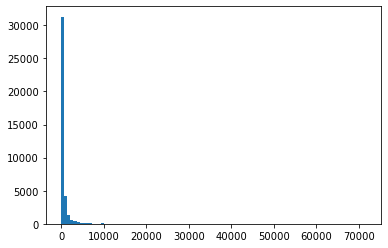

In [24]:
plt.hist(beijing.price, bins = 100)
plt.show()

The distribution is not normal and is heavily skewed, I think it is better to use log-transformation.
#### 2.4

In [25]:
beijing["bedrooms_category"] = pd.cut(beijing.bedrooms,
                                      bins = [ 0, 1, 2, 3, 4, np.inf], 
                                      labels = ["0", "1", "2", "3", "4+"],
                                      right = False)
beijing.head(3)

,id,price,bedrooms,room_type,accommodates,bathrooms,bedrooms_category
0,44054,831.0,3.0,Entire home/apt,9,2.0,3
1,100213,1197.0,1.0,Private room,2,1.0,1
2,103749,598.0,1.0,Entire home/apt,2,1.0,1


#### 2.5

In [26]:
m = smf.ols("price ~ C(bedrooms_category)", data = beijing).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1093.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        21:23:21   Log-Likelihood:            -3.4140e+05
No. Observations:               38695   AIC:                         6.828e+05
Df Residuals:                   38690   BIC:                         6.829e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    446.9831    106.927      4.180      0.000     237.403     656.563
C(bedrooms_category)[T.1]     -9.8393    107.417     -0.092      0.927    -220.379     200.701
C(bedrooms_category)[T.2]    297.7636    108.566      2.743      0.006      84.972     510.555
C(bedrooms_category)[T.3]    747.9222    111.736      6.694      0.000     528.917     966.928
C(bedrooms_category)[T.4+]  2169.7409    111.766     19.413      0.000    1950.677    2388.804
==============================================================================
Omnibus:                    95869.332   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1540596730.295
Skew:                          26.867   Prob(JB):                         0.00
Kurtosis:                     979.035   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^2$ is 0.102, which means only 10% percents of original data match the estimated model.
#### 2.6

In [27]:
beijing["log_price"] = np.log(beijing.price + 1) # plus 1 for some price is 0
beijing.head(3)

,id,price,bedrooms,room_type,accommodates,bathrooms,bedrooms_category,log_price
0,44054,831.0,3.0,Entire home/apt,9,2.0,3,6.723832
1,100213,1197.0,1.0,Private room,2,1.0,1,7.088409
2,103749,598.0,1.0,Entire home/apt,2,1.0,1,6.395262


In [28]:
m = smf.ols("log_price ~ C(bedrooms_category)", data = beijing).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     4505.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        21:23:27   Log-Likelihood:                -40306.
No. Observations:               38695   AIC:                         8.062e+04
Df Residuals:                   38690   BIC:                         8.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      5.7907      0.045    129.723      0.000       5.703       5.878
C(bedrooms_category)[T.1]     -0.0092      0.045     -0.205      0.837      -0.097       0.079
C(bedrooms_category)[T.2]      0.5527      0.045     12.195      0.000       0.464       0.642
C(bedrooms_category)[T.3]      0.9620      0.047     20.623      0.000       0.871       1.053
C(bedrooms_category)[T.4+]     1.6152      0.047     34.617      0.000       1.524       1.707
==============================================================================
Omnibus:                     4146.097   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28700.325
Skew:                           0.275   Prob(JB):                         0.00
Kurtosis:                       7.183   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The $R^2$ is 0.318, which means about 32% percents of original data match the estimated model. And this means new model for log price is more accurate than model for original price.
#### 2.7

In [29]:
beijing["bathrooms"] = np.rint(beijing.bathrooms) # round values to integers
beijing.describe()

,id,price,bedrooms,accommodates,bathrooms,log_price
count,3.869500e+04,38695.000000,38695.000000,38695.000000,38695.000000,38695.000000
mean,3.149479e+07,691.829409,1.637137,3.708179,1.435664,6.063979
std,7.668581e+06,1732.909305,1.411635,2.987175,1.261240,0.830200
min,4.405400e+04,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.713770e+07,260.000000,1.000000,2.000000,1.000000,5.564520
50%,3.388673e+07,401.000000,1.000000,2.000000,1.000000,5.996452
75%,3.767586e+07,619.000000,2.000000,4.000000,2.000000,6.429719
max,4.034329e+07,71603.000000,50.000000,34.000000,102.000000,11.178906


Reference: [rounding method](https://numpy.org/doc/stable/reference/generated/numpy.rint.html)

In [30]:
beijing["bathrooms_category"] = pd.cut(beijing.bathrooms,
                                      bins = [ 0, 1, 2, 3, np.inf], 
                                      labels = ["0", "1", "2", "3 and more"],
                                      right = False)
beijing["accommodates_category"] = pd.cut(beijing.accommodates,
                                      bins = [ 1, 2, 3, 4, np.inf], 
                                      labels = ["1", "2", "3", "4 and more"],
                                      right = False)
beijing.head(3)

,id,price,bedrooms,room_type,accommodates,bathrooms,bedrooms_category,log_price,bathrooms_category,accommodates_category
0,44054,831.0,3.0,Entire home/apt,9,2.0,3,6.723832,2,4 and more
1,100213,1197.0,1.0,Private room,2,1.0,1,7.088409,1,2
2,103749,598.0,1.0,Entire home/apt,2,1.0,1,6.395262,1,2


In [31]:
m = smf.ols("log_price ~ C(bedrooms_category) + C(room_type) + C(accommodates_category) + C(bathrooms_category)", data = beijing).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     2692.
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        21:23:41   Log-Likelihood:                -35959.
No. Observations:               38695   AIC:                         7.194e+04
Df Residuals:                   38682   BIC:                         7.205e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                  5.3977      0.048    113.180      0.000       5.304       5.491
C(bedrooms_category)[T.1]                  0.0753      0.040      1.877      0.061      -0.003       0.154
C(bedrooms_category)[T.2]                  0.2109      0.041      5.130      0.000       0.130       0.292
C(bedrooms_category)[T.3]                  0.5074      0.042     11.942      0.000       0.424       0.591
C(bedrooms_category)[T.4+]                 0.8507      0.044     19.245      0.000       0.764       0.937
C(room_type)[T.Private room]              -0.3188      0.007    -42.867      0.000      -0.333      -0.304
C(room_type)[T.Shared room]               -0.9353      0.017    -55.268      0.000      -0.968      -0.902
C(accommodates_category)[T.2]              0.3286      0.014     24.265      0.000       0.302       0.355
C(accommodates_category)[T.3]              0.3915      0.017     23.400      0.000       0.359       0.424
C(accommodates_category)[T.4 and more]     0.6045      0.016     38.859      0.000       0.574       0.635
C(bathrooms_category)[T.1]                 0.1701      0.024      7.081      0.000       0.123       0.217
C(bathrooms_category)[T.2]                 0.2088      0.025      8.435      0.000       0.160       0.257
C(bathrooms_category)[T.3 and more]        0.8317      0.030     27.770      0.000       0.773       0.890
==============================================================================
Omnibus:                     8677.724   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80118.555
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       9.857   Cond. No.                         47.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
beijing.room_type.unique() # checking reference variable.

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

$R^2$ is 0.455, that is the model fits 45.5 percentage of the real data. In this model, the reference categories are 1 in accommdates, Entire home/apt for room type, 0 bathrooms, and 0 bedrooms. From the result, the log price increases as numbers of bedrooms, bathrooms, and addommodates increases. And the log price decreases for 0.3188 if room type being private room, and decreases for 0.9353 for room type being shared room. And these results are consistent to our common sense.\
\
\
I spent approximately 6 hours on this PS6.